 * Copyright 2024 Xue_Lexiang
 * Licensed under MIT (https://github.com/xuelx1/LearnQC/LISENCE)

## Addition in quantum computing

#### T. Draper (2000), Addition on a quantum computer, quant-ph/0008033.

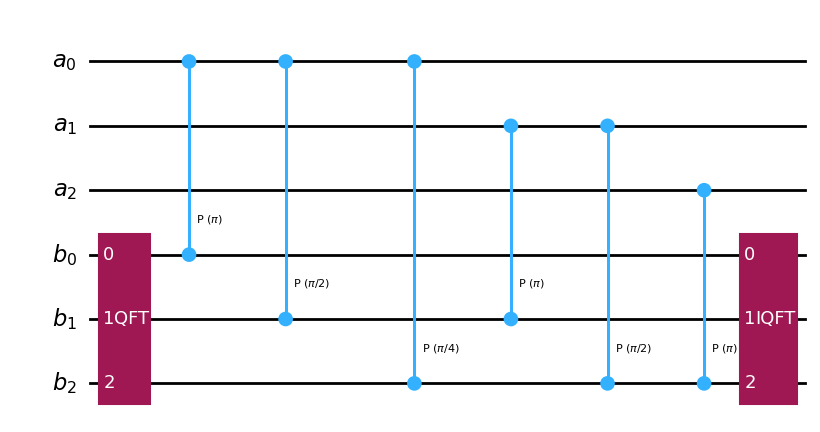

In [3]:
import itertools
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.circuit.library import DraperQFTAdder

backend = AerSimulator()
adder = DraperQFTAdder(3).decompose()

adder.draw(output='mpl')

In [4]:
def bin_rev2dec(bin_lst):
    dec = 0
    for i in len(bin_lst):
        dec += int(bin_lst[i]) * 2**(len(bin_lst) - i - 1)
    return dec


In [5]:
for l in list(itertools.product([0, 1], repeat=6)):
    qc = QuantumCircuit(6)
    
    for i, bit in enumerate(l):
        if bit == 1: 
            qc.x(i)
    qc.append(adder, [0, 1, 2, 3, 4, 5])
    qc.measure_all()
    summand1 = 0
    for i in range(3):
        if l[i] == 1: 
            summand1 += 2**(i)
    summand2 = 0
    for i in range(3):
        if l[i+3] == 1: 
            summand2 += 2**(i)
    sum = 0
    job = backend.run(transpile(qc, backend), shots=1024)
    res_dict = job.result().get_counts()
    res_sum = res_dict.most_frequent()
    sum = 0
    for i in range(3):
        if res_sum[i] == '1': 
            sum += 2**(2-i)
    print(f"{summand1} + {summand2} = {sum}")

0 + 0 = 0
0 + 4 = 4
0 + 2 = 2
0 + 6 = 6
0 + 1 = 1
0 + 5 = 5
0 + 3 = 3
0 + 7 = 7
4 + 0 = 4
4 + 4 = 0
4 + 2 = 6
4 + 6 = 2
4 + 1 = 5
4 + 5 = 1
4 + 3 = 7
4 + 7 = 3
2 + 0 = 2
2 + 4 = 6
2 + 2 = 4
2 + 6 = 0
2 + 1 = 3
2 + 5 = 7
2 + 3 = 5
2 + 7 = 1
6 + 0 = 6
6 + 4 = 2
6 + 2 = 0
6 + 6 = 4
6 + 1 = 7
6 + 5 = 3
6 + 3 = 1
6 + 7 = 5
1 + 0 = 1
1 + 4 = 5
1 + 2 = 3
1 + 6 = 7
1 + 1 = 2
1 + 5 = 6
1 + 3 = 4
1 + 7 = 0
5 + 0 = 5
5 + 4 = 1
5 + 2 = 7
5 + 6 = 3
5 + 1 = 6
5 + 5 = 2
5 + 3 = 0
5 + 7 = 4
3 + 0 = 3
3 + 4 = 7
3 + 2 = 5
3 + 6 = 1
3 + 1 = 4
3 + 5 = 0
3 + 3 = 6
3 + 7 = 2
7 + 0 = 7
7 + 4 = 3
7 + 2 = 1
7 + 6 = 5
7 + 1 = 0
7 + 5 = 4
7 + 3 = 2
7 + 7 = 6


## Multiplier

####  Ruiz-Perez et al., Quantum arithmetic with the Quantum Fourier Transform, 2017. arXiv:1411.5949

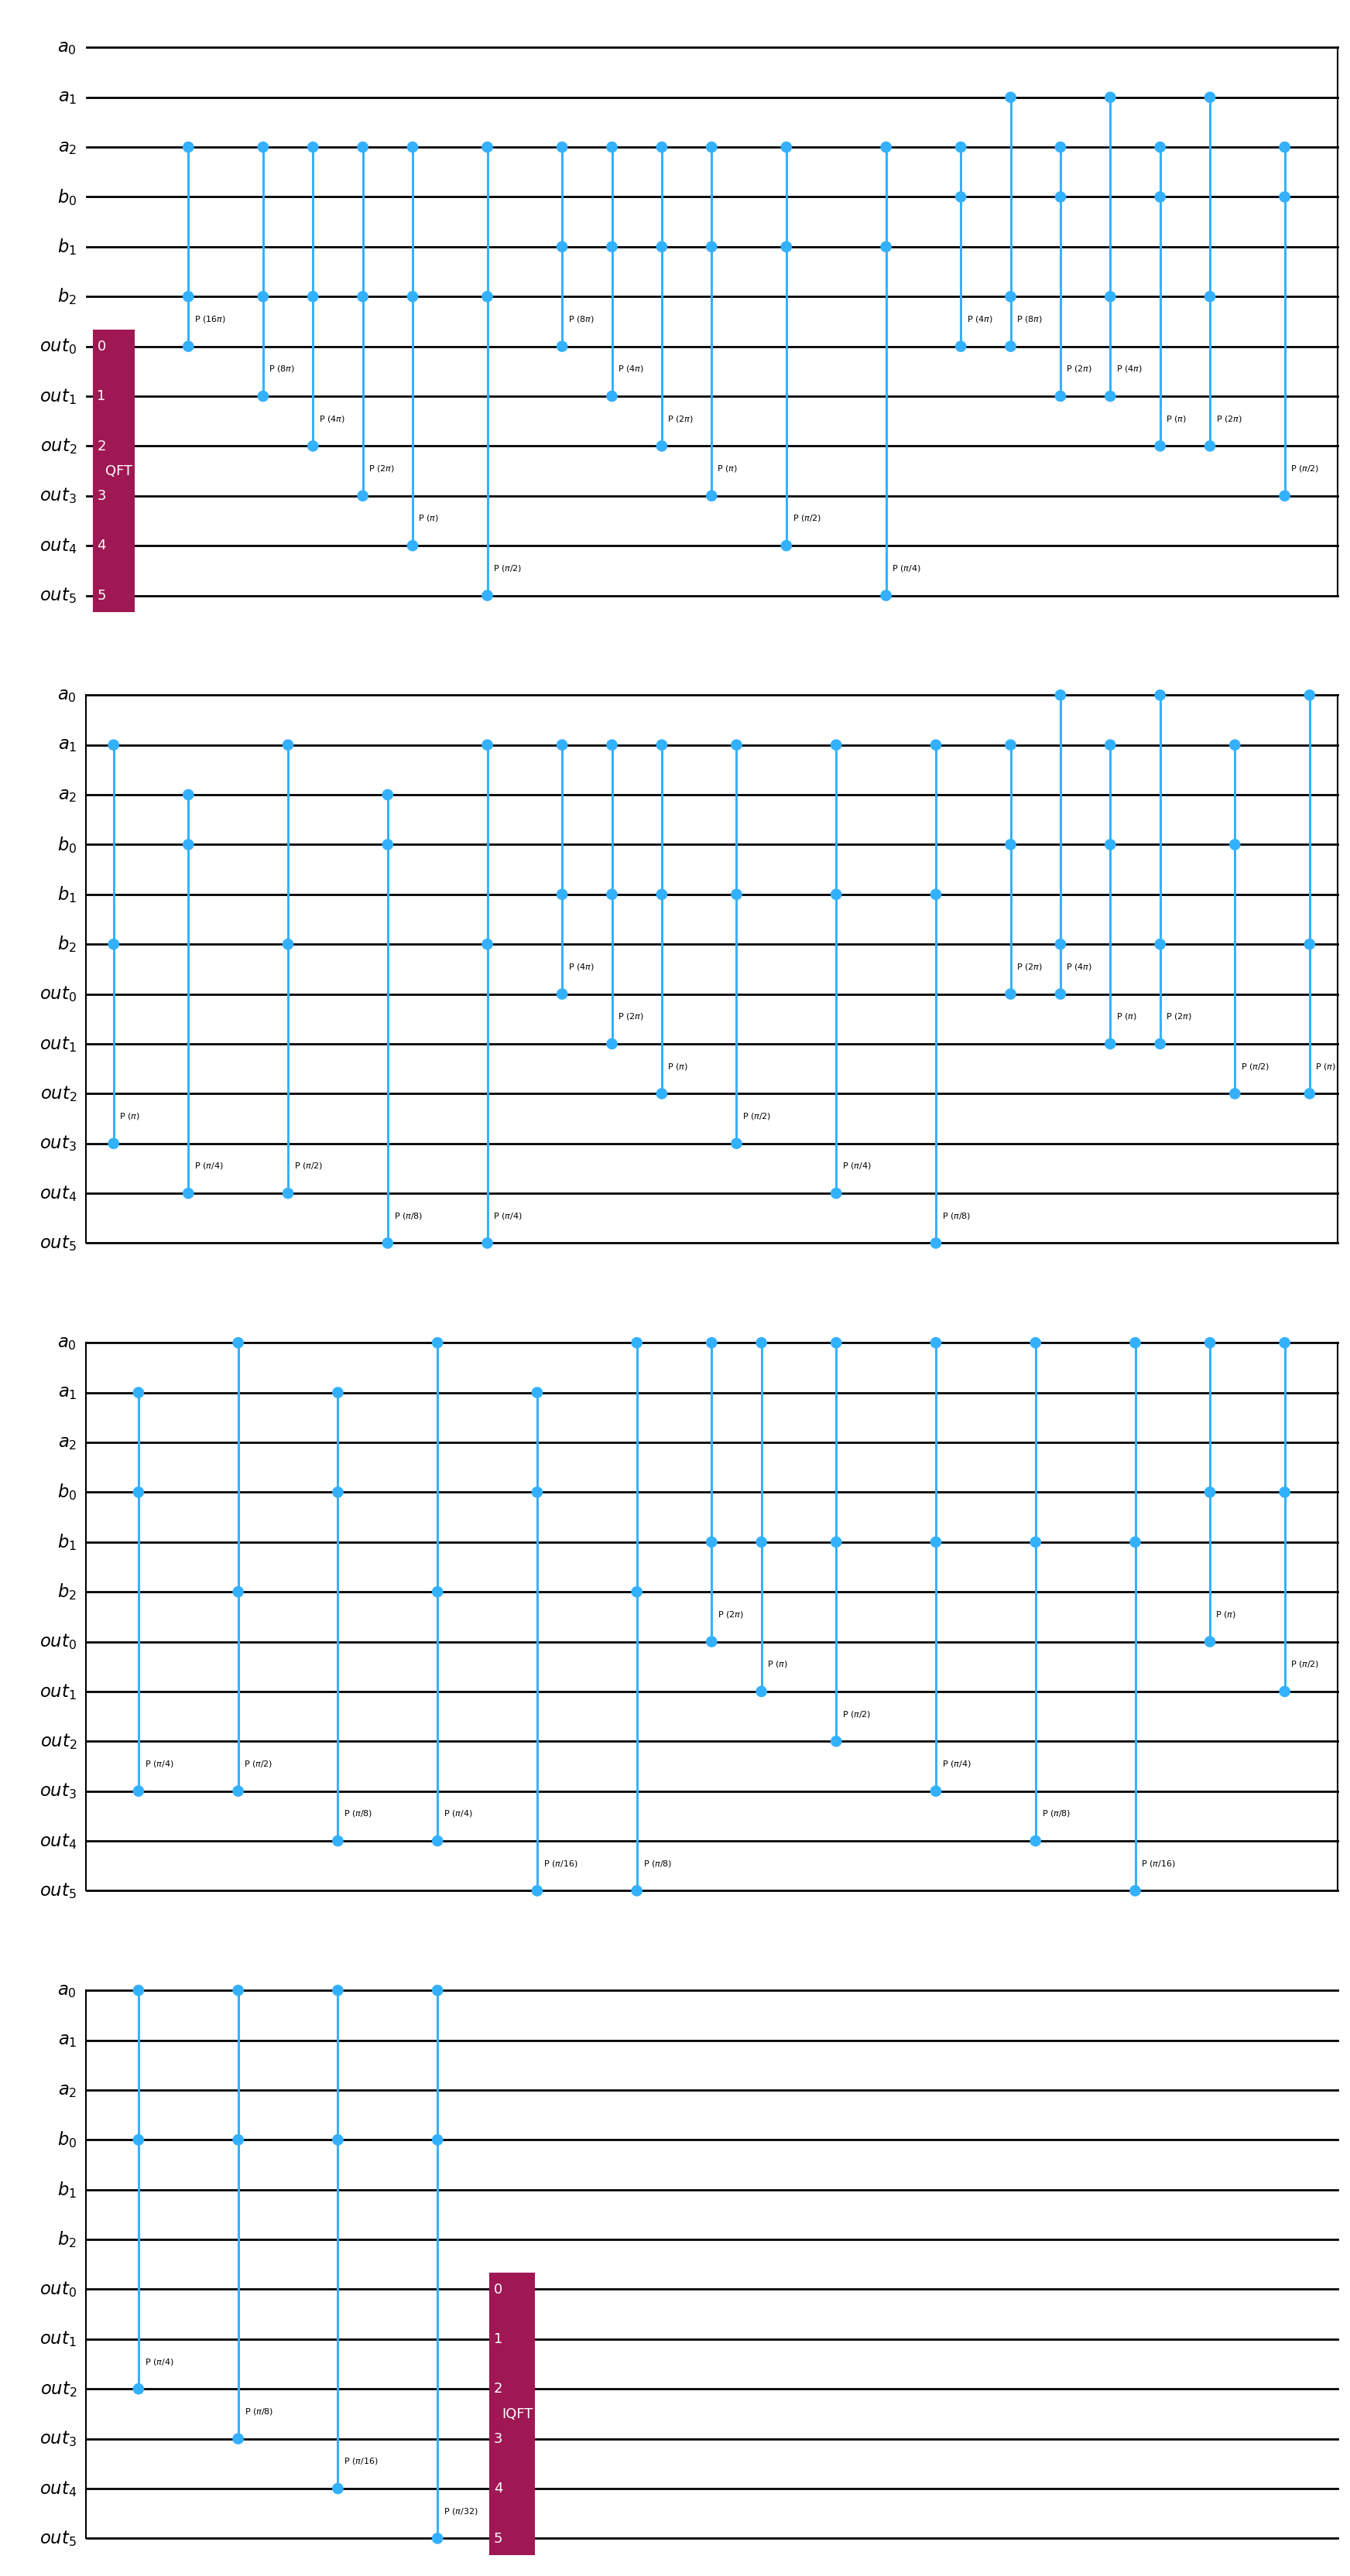

In [6]:
from qiskit.circuit.library import RGQFTMultiplier

multiplier = RGQFTMultiplier(3).decompose()
multiplier.draw(output='mpl')

In [15]:
for l in list(itertools.product([0, 1], repeat=6)):
    qc = QuantumCircuit(12)
    
    for i, bit in enumerate(l):
        if bit == 1: 
            qc.x(i)
    qc.append(multiplier, list(range(12)))
    qc.measure_all()
    job = backend.run(transpile(qc, backend), shots=1024)
    res_product = job.result().get_counts().most_frequent()
    mulcand1 = 0
    mulcand2 = 0
    for i in range(3):
        if l[i] == 1:
            mulcand1 += 2**i
        if l[i+3] == 1:
            mulcand2 += 2**i
    product = 0
    for i in range(6):
        if res_product[i] == '1':
            product += 2**(5-i)
    print(f"{mulcand1} x {mulcand2} = {product}")

0 x 0 = 0
0 x 4 = 0
0 x 2 = 0
0 x 6 = 0
0 x 1 = 0
0 x 5 = 0
0 x 3 = 0
0 x 7 = 0
4 x 0 = 0
4 x 4 = 16
4 x 2 = 8
4 x 6 = 24
4 x 1 = 4
4 x 5 = 20
4 x 3 = 12
4 x 7 = 28
2 x 0 = 0
2 x 4 = 8
2 x 2 = 4
2 x 6 = 12
2 x 1 = 2
2 x 5 = 10
2 x 3 = 6
2 x 7 = 14
6 x 0 = 0
6 x 4 = 24
6 x 2 = 12
6 x 6 = 36
6 x 1 = 6
6 x 5 = 30
6 x 3 = 18
6 x 7 = 42
1 x 0 = 0
1 x 4 = 4
1 x 2 = 2
1 x 6 = 6
1 x 1 = 1
1 x 5 = 5
1 x 3 = 3
1 x 7 = 7
5 x 0 = 0
5 x 4 = 20
5 x 2 = 10
5 x 6 = 30
5 x 1 = 5
5 x 5 = 25
5 x 3 = 15
5 x 7 = 35
3 x 0 = 0
3 x 4 = 12
3 x 2 = 6
3 x 6 = 18
3 x 1 = 3
3 x 5 = 15
3 x 3 = 9
3 x 7 = 21
7 x 0 = 0
7 x 4 = 28
7 x 2 = 14
7 x 6 = 42
7 x 1 = 7
7 x 5 = 35
7 x 3 = 21
7 x 7 = 49
